In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("mirrorPublications_featured_final.csv")

# Creazione di un dizionario che assegna un numero univoco a ciascun topic
topic_mapping = {topic: i+1 for i, topic in enumerate(df['topic'].unique())}

# Creazione della nuova colonna numerica basata sulla mappatura
df['topic_numeric'] = df['topic'].map(topic_mapping)

df.loc[:, 'Price(ETH)'] = df['Price(ETH)'].replace(0, 0.0001)
df.loc[:, 'Success'] = (df['Total Sold Numbers'] * df['Price(ETH)']) / (df['Total Buyers'] + 1)

df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,characters,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,topic_numeric,Success
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.6900,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,1156.0,204.0,61.0,56.0,13.0,13.0,25.0,13.0,1,0.696509
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.4200,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,2201.0,522.0,223.0,175.0,11.0,11.0,88.0,51.0,2,0.423415
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.0420,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,15845.0,4447.0,2762.0,1137.0,55.0,49.0,624.0,392.0,3,0.048157
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.0020,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,5578.0,1439.0,648.0,351.0,33.0,33.0,246.0,117.0,4,0.002029
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.0020,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,3351.0,986.0,602.0,342.0,37.0,38.0,197.0,104.0,3,0.002187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.0001,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,2363.0,720.0,424.0,249.0,17.0,15.0,149.0,76.0,7,0.000093
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.0001,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,13799.0,3807.0,2488.0,898.0,76.0,75.0,584.0,234.0,5,0.000067
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.0001,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,130.0,28.0,5.0,5.0,2.0,3.0,3.0,2.0,1,0.000050
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.0001,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,186.0,58.0,36.0,33.0,1.0,1.0,12.0,5.0,6,0.000100


In [2]:
# Trova i quartili per definire le soglie
q1 = df['Success'].quantile(0.25)
q2 = df['Success'].quantile(0.5)  # Mediana
q3 = df['Success'].quantile(0.75)

print(f"Q1: {q1}, Q2 (mediana): {q2}, Q3: {q3}")

Q1: 5e-05, Q2 (mediana): 8e-05, Q3: 0.00010333333333333334


In [3]:
# Calcolare i quartili
q1 = df['Success'].quantile(0.25)
q2 = df['Success'].quantile(0.5)  # Mediana
q3 = df['Success'].quantile(0.75)

# Contare quante righe appartengono a ciascun quartile
count_q1 = (df['Success'] < q1).sum()
count_q2 = ((df['Success'] >= q1) & (df['Success'] < q2)).sum()
count_q3 = ((df['Success'] >= q2) & (df['Success'] < q3)).sum()
count_q4 = (df['Success'] >= q3).sum()

# Visualizzare i conteggi per ciascun quartile
print(f"Righe nel primo quartile (Success < Q1): {count_q1}")
print(f"Righe nel secondo quartile (Q1 <= Success < Q2): {count_q2}")
print(f"Righe nel terzo quartile (Q2 <= Success < Q3): {count_q3}")
print(f"Righe nel quarto quartile (Success >= Q3): {count_q4}")

Righe nel primo quartile (Success < Q1): 1
Righe nel secondo quartile (Q1 <= Success < Q2): 13168
Righe nel terzo quartile (Q2 <= Success < Q3): 6989
Righe nel quarto quartile (Success >= Q3): 6721


In [4]:
labels = ['Basso', 'Medio-Basso', 'Medio-Alto', 'Alto']
df['SuccessClass'] = pd.qcut(df['Success'], q=4, labels=labels) #divisione in percentili, 4 classi circa equiprobabili

class_counts = df['SuccessClass'].value_counts()

class_counts

SuccessClass
Basso          8625
Alto           6718
Medio-Alto     6091
Medio-Basso    5445
Name: count, dtype: int64

In [5]:
classe_mapping = {'Basso': 0, 'Medio-Basso': 1, 'Medio-Alto': 2, 'Alto': 3}
df['SuccessClass'] = df['SuccessClass'].map(classe_mapping)

df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,topic_numeric,Success,SuccessClass
0,https://opensea.io/assets/optimism/0x96c200ec4...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,73.830,107,105,0.6900,0x96c200ec4cca0bc57444cfee888cfba78a1ddbd8,lore-7-miberamaker-design-document,[2.5],2024-01-29,...,204.0,61.0,56.0,13.0,13.0,25.0,13.0,1,0.696509,3
1,https://opensea.io/assets/optimism/0x7988434e1...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,52.080,124,122,0.4200,0x7988434e1469d35fa5f442e649de45d47c3df23c,lore-6-miberamaker-design-document,[2.5],2024-01-22,...,522.0,223.0,175.0,11.0,11.0,88.0,51.0,2,0.423415,3
2,https://opensea.io/assets/optimism/0x093312465...,https://mirror.xyz/0xe822ecac55a3a20bb4b24cdd8...,23.982,571,497,0.0420,0x093312465e593c65b1f00e0ab8c5885634b2aa83,berafi-bong-bears-x-nftfi,"[2.5, 10.0]",2023-02-23,...,4447.0,2762.0,1137.0,55.0,49.0,624.0,392.0,3,0.048157,3
3,https://opensea.io/assets/optimism/0x901c2436d...,https://mirror.xyz/0xff5ae9b0a7522736299d797d8...,20.000,10000,9855,0.0020,0x901c2436d9d57cb8c0fc47d10e30c0c5be943dcb,announcing-the-results-of-retropgf-2,"[2.5, 10.0]",2023-03-30,...,1439.0,648.0,351.0,33.0,33.0,246.0,117.0,4,0.002029,3
4,https://opensea.io/assets/optimism/0xe53f95be1...,https://mirror.xyz/0x000002c34bae6dd7bec72acba...,20.000,10000,9144,0.0020,0xe53f95be16ee1d2a6a6afb3eedbb9969d337dea7,syncswap-era-testnet-is-now-live,"[2.5, 10.0]",2023-03-01,...,986.0,602.0,342.0,37.0,38.0,197.0,104.0,3,0.002187,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,https://opensea.io/assets/optimism/0xe6aa6aaf3...,https://mirror.xyz/0x75aaf4a296c7e115c5757f936...,0.000,14,14,0.0001,0xe6aa6aaf3ba199a09042cd00fb0052fa9d6f33c0,superseed-joins-the-superchain,[2.5],2024-10-15,...,720.0,424.0,249.0,17.0,15.0,149.0,76.0,7,0.000093,2
26875,https://opensea.io/assets/optimism/0xe82941552...,https://mirror.xyz/0x8073639b11994c549eda58fc3...,0.000,2,2,0.0001,0xe829415523b4d89361116dde50a5eb841b60c71a,gr15-how-to-donate-to-gitcoin-grants,[2.5],2023-06-27,...,3807.0,2488.0,898.0,76.0,75.0,584.0,234.0,5,0.000067,1
26876,https://opensea.io/assets/optimism/0x0eedbed03...,https://mirror.xyz/0x179b847833532783f84667ece...,0.000,1,1,0.0001,0x0eedbed0325298e6b42d4b1904e42ecc8f40041e,good-project-pnkzyk1jmu,"[2.5, 10.0]",2023-02-05,...,28.0,5.0,5.0,2.0,3.0,3.0,2.0,1,0.000050,0
26877,https://opensea.io/assets/optimism/0x440f392c7...,https://mirror.xyz/0x6babf8a88741f75eb09e3a81f...,0.000,2,1,0.0001,0x440f392c7c01dfc3b64c635f3dca3794439b44d0,kazakhstan-forbids,"[2.5, 10.0]",2023-02-10,...,58.0,36.0,33.0,1.0,1.0,12.0,5.0,6,0.000100,2


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers',
    'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 
    'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language',
    'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic",
    'transaction_id', 'Success', 'SuccessClass'])
y = df['SuccessClass']

#suddivido in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#imputo i valori NaN in base alla media (ho provato anche con mediana ma non cambia nulla)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#standardizzo i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Epoch 1/100
538/538 [==============================] - 1s 704us/step - loss: 1.4189 - accuracy: 0.3468 - val_loss: 1.3654 - val_accuracy: 0.3783
Epoch 2/100
538/538 [==============================] - 0s 620us/step - loss: 1.3718 - accuracy: 0.3762 - val_loss: 1.3473 - val_accuracy: 0.3906
Epoch 3/100
538/538 [==============================] - 0s 620us/step - loss: 1.3585 - accuracy: 0.3910 - val_loss: 1.3390 - val_accuracy: 0.3973
Epoch 4/100
538/538 [==============================] - 0s 615us/step - loss: 1.3446 - accuracy: 0.3986 - val_loss: 1.3311 - val_accuracy: 0.4015
Epoch 5/100
538/538 [==============================] - 0s 616us/step - loss: 1.3339 - accuracy: 0.4015 - val_loss: 1.3268 - val_accuracy: 0.4036
Epoch 6/100
538/538 [==============================] - 0s 622us/step - loss: 1.3348 - accuracy: 0.4023 - val_loss: 1.3231 - val_accuracy: 0.4104
Epoch 7/100
538/538 [==============================] - 0s 620us/step - loss: 1.3287 - accuracy: 0.4108 - val_loss: 1.3201 - val_ac

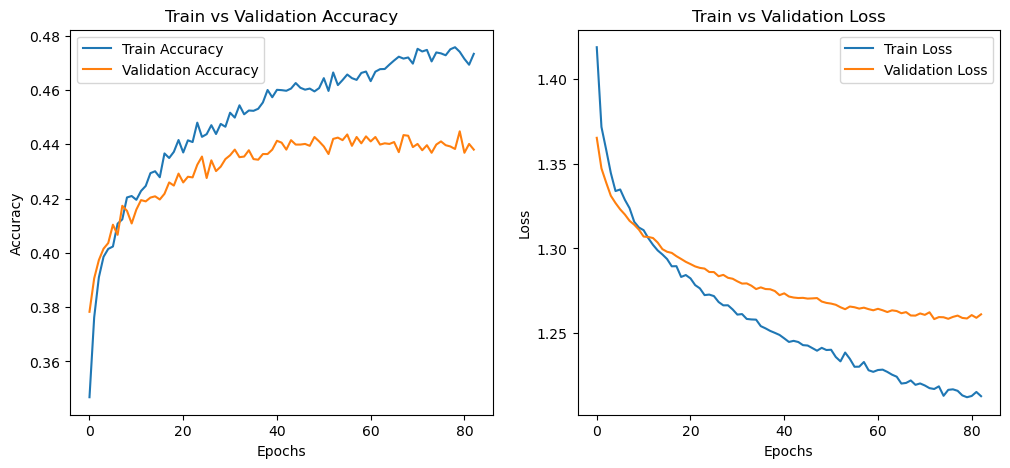

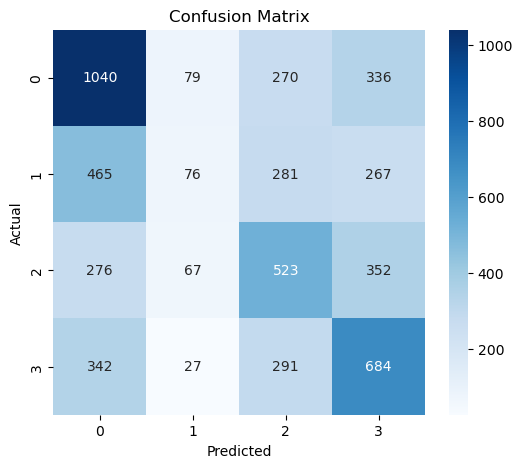

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def build_and_train_best_model_multiclass(X_train_scaled, y_train, X_test_scaled, y_test):
    # Parametri ottimizzati
    units_layer1 = 224
    units_layer2 = 160
    dropout_rate1 = 0.1
    dropout_rate2 = 0.5
    l2_rate = 0.0002708552306012994
    learning_rate = 0.0001

    # Costruzione del modello
    model = Sequential()
    model.add(Dense(
        units=units_layer1,
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(l2_rate)  # Regolarizzazione L2
    ))
    model.add(Dropout(dropout_rate1))  # Dropout dopo il primo livello

    model.add(Dense(
        units=units_layer2,
        activation='swish',
        kernel_regularizer=l2(l2_rate)  # Regolarizzazione L2
    ))
    model.add(Dropout(dropout_rate2))  # Dropout dopo il secondo livello

    # Modifica l'output per la classificazione multiclasse
    num_classes = len(np.unique(y_train))  # Determina il numero di classi
    model.add(Dense(num_classes, activation='softmax'))  # Livello di output per multiclasse

    # Compilazione del modello
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Modifica la funzione di perdita per target numerici
        metrics=['accuracy']
    )

    # Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Addestramento del modello
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        validation_split=0.2,
        batch_size=32,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Valutazione sul test set
    y_pred_proba = model.predict(X_test_scaled)
    y_pred = y_pred_proba.argmax(axis=1)  # Predizione per la classe con la probabilità più alta

    # Stampa il classification report
    from sklearn.metrics import classification_report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualizzazione della cronologia dell'addestramento
    plt.figure(figsize=(12, 5))

    # Accuratezza
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train vs Validation Accuracy')

    # Perdita
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Validation Loss')

    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Restituisce il modello addestrato
    return model

# Esegui la funzione con i target numerici (0, 1, 2, 3)
model = build_and_train_best_model_multiclass(X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.53      0.61      0.57      1725
           1       0.32      0.12      0.18      1089
           2       0.40      0.47      0.43      1218
           3       0.49      0.55      0.51      1344

    accuracy                           0.46      5376
   macro avg       0.43      0.44      0.42      5376
weighted avg       0.45      0.46      0.44      5376



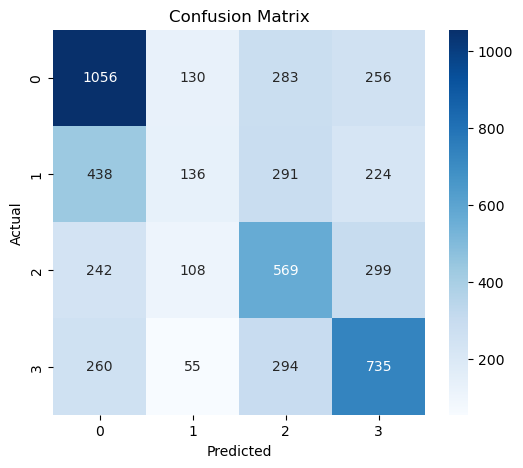

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Alleno il modello GB per la classificazione multiclass
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    random_state=42
)

# Adatto il modello ai dati
gb_model.fit(X_train_scaled, y_train)

# Previsioni sui dati di test
y_pred = gb_model.predict(X_test_scaled)

# Valutazioni del modello
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Migliori parametri: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.52      0.62      0.56      1725
           1       0.34      0.10      0.15      1089
           2       0.40      0.48      0.44      1218
           3       0.48      0.54      0.51      1344

    accuracy                           0.46      5376
   macro avg       0.43      0.44      0.42      5376
weighted avg       0.45      0.46      0.44      5376



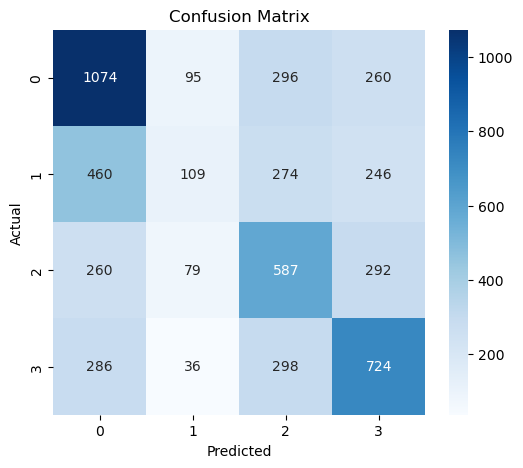

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 800x500 with 0 Axes>

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definizione del modello con iperparametri di base
gb_model = GradientBoostingClassifier(random_state=42)

# Griglia di parametri per la ricerca ottimizzata
param_grid = {
    'learning_rate': [0.01, 0.2],
    'n_estimators': [100, 300],
    'max_depth': [5, 7]
}

# Cross-validation e ricerca dei migliori iperparametri
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Migliori parametri trovati
best_params = grid_search.best_params_
print(f'Migliori parametri: {best_params}')

# Allenamento del modello con i migliori parametri
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train_scaled, y_train)

# Previsioni
y_pred = best_gb_model.predict(X_test_scaled)

# Valutazione del modello
print(classification_report(y_test, y_pred))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
df.groupby('SuccessClass')['Success'].agg(['min', 'max'])

/var/folders/7s/nk6tlb4x0430nvtq2mh4r4gr0000gn/T/ipykernel_7506/4292096037.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('SuccessClass')['Success'].agg(['min', 'max'])


,min,max
SuccessClass,,
0,0.000027,0.000050
1,0.000067,0.000080
2,0.000083,0.000103
3,0.000103,7.610000


<h2>Commenti di ChatGPT:</h2>

<h4>Analisi per classe</h4>
Classe 0 (Basso successo)

1074 correttamente classificati come "Basso".
95 classificati erroneamente come "Medio-Basso".
296 classificati erroneamente come "Medio-Alto".
260 classificati erroneamente come "Alto".
→ Il modello fa un buon lavoro nel riconoscere la classe 0, ma tende a confonderla con le altre.
Classe 1 (Medio-Basso successo)

109 correttamente classificati.
460 scambiati per "Basso".
274 scambiati per "Medio-Alto".
246 scambiati per "Alto".
→ Il modello ha difficoltà con questa classe, specialmente confondendola con la classe 0 (Basso).
Classe 2 (Medio-Alto successo)

587 correttamente classificati.
260 scambiati per "Basso".
79 scambiati per "Medio-Basso".
292 scambiati per "Alto".
→ Discreta accuratezza, ma ancora confusione tra classi adiacenti.
Classe 3 (Alto successo)

724 correttamente classificati.
286 scambiati per "Basso".
36 scambiati per "Medio-Basso".
298 scambiati per "Medio-Alto".
→ Buona performance, ma il modello tende a confondere gli "Alti" con classi inferiori.

<h4>Punti critici</h4>

La classe 1 (Medio-Basso) è la più problematica, con molte predizioni errate, specialmente verso la classe 0.
Le classi 0 (Basso) e 3 (Alto) sono le più riconosciute, ma il modello sbaglia comunque una parte significativa.
C’è una tendenza a confondere classi vicine tra loro (ad es. "Medio-Alto" viene scambiato per "Alto" e viceversa).



<h3>Da fare domani: prova a ribilanciare le classi!</h3>